In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
torch.manual_seed(0)
from torch import nn
import torch.nn.functional as F
import torchzero as tz
from visualbench import FunctionDescent, test_functions

# 8. Line search

### 8.1 Introduction

Given a direction $d_t$ produced by some optimization algorithm, e.g. gradient descent or BFGS, a line search minimizes the function along $d_t$. In other words it tries to find a good step size which leads to decrease of the function value or satisfies some other condition.

### 8.2 Backtracking

Backtracking line search starts with initial step size (typically 1), then it keeps decreasing the step size by multiplying by $\tau$ (typically 0.5) until the sufficient decrease condition is satisfied.

We might terminate the line search as soon as it finds a step size that leads to decrease of the objective function. However if the decrease is too small, the progress can be too slow. Therefore usually we don't accept any decrease, instead we accept decrease that satisfies the sufficient decrease condition (also known as Armijo condition). The condition is satisfied if:
$$
f(x_t - \alpha d_t) \leq f(x_t) - c \cdot \alpha \cdot \nabla f(x_t)^T d_t
$$
Here $\alpha$ is the step size, $c$ is the Armijo condition parameter (between 0 and 1), $\nabla f(x_t)^T d_t$ is directional derivative in the direction $d_t$.

Geometrically the step size is accepted if it is under the line that goes through $x_t$ (where $\alpha = 0$). If $c$ = 0, the line is horizontal; if $c$ = 1, the line is tangent to the function. In practice $c$ is often set to a small value such as 0.01.

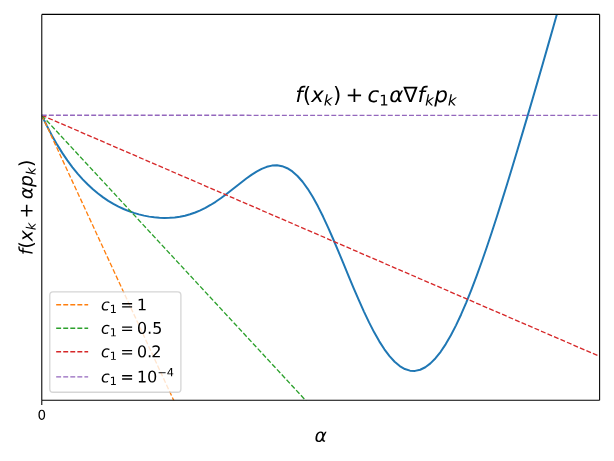

image from https://tm23forest.com/contents/linesearch-armijo-wolfe-condition-explained-visually

finished in 0.1s., reached loss = 0                                      


<Axes: >

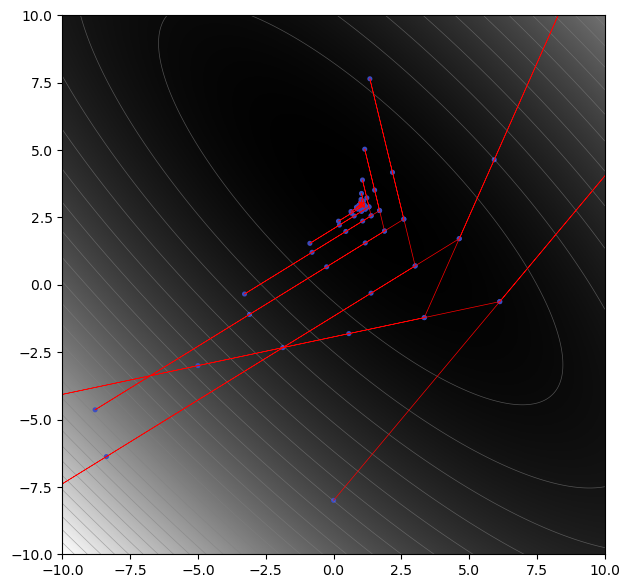

In [3]:
func = FunctionDescent('booth')
optimizer = tz.Optimizer(func.parameters(), tz.m.Backtracking(c=0.001))
func.run(optimizer, max_steps=50)
func.plot()

### 8.3 Strong-Wolfe
The strong curvature condition is satisfied if:
$$
|g(-\alpha)| \leq c \cdot |g(0)|
$$

Here $g(0)$ is directional derivative at initial point $x_t$ computed as $\nabla f(x_t)^T d_t$,

$g(-\alpha)$ is directional derivative at $x_t - \alpha d_t$ computed as $\nabla f(x_t - \alpha d_t)^T d_t$,

$c$ is a condition parameter, typically set to 0.9 for quasi-newton methods and to 0.1 for conjugate gradient methods.

Geometrically strong curvature condition is satisfied if the slope at $f(-\alpha)$ is smaller than at f(0). If $c=0$, the slope must be 0.

A particular kind of line search with bracketing and zooming phases, which often uses cubic interpolation, is sometimes called Strong-Wolfe line search. It terminates when both sufficient decrease and strong curvature conditions are satisfied (the combination of those is called the Strong-Wolfe condition). The algorithm is described in [1] on pages 60-61. This kind of line search is faster due to use of interpolation, however unlike backtracking line search it requires gradients to be evaluated at each point during the line search.

Reference: 
1. [Wright, Stephen, and Jorge Nocedal. "Numerical optimization." Springer Science 35.67-68 (1999): 7.](https://www.math.uci.edu/~qnie/Publications/NumericalOptimization.pdf)

finished in 0.2s., reached loss = 0                                      


<Axes: >

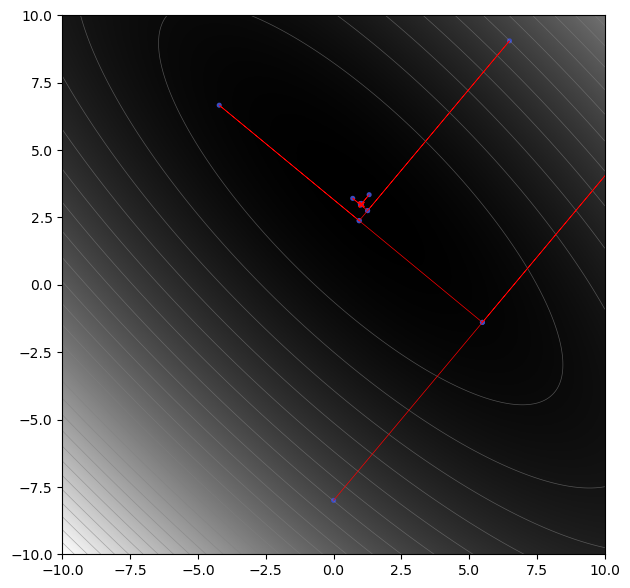

In [4]:
func = FunctionDescent('booth')
optimizer = tz.Optimizer(func.parameters(), tz.m.StrongWolfe())
func.run(optimizer, max_steps=50)
func.plot()

### 8.4 What line search to use

Strong-Wolfe line search returns step sizes that satisfy the strong curvature condition, which is actually necessary for some algorithms such as SR1 and conjugate gradient methods.

If curvature condition need not be satisfied and the algorithm produces well-scaled directions (e.g. in Newton methods, BFGS/L-BGFS), backtracking line search often performs better.

When the algorithm does not produce well scaled directions, for example gradient descent and conjugate gradient, the initial step size guess in Strong-Wolfe line search should be estimated using past function values and derivatives. This can be done by passing ``a_init="quadratic"`` or ``a_init="first-order"``.

finished in 0.1s., reached loss = 0.139                                      
finished in 0.1s., reached loss = 0                                      
finished in 0.1s., reached loss = 5.7e-12                                      


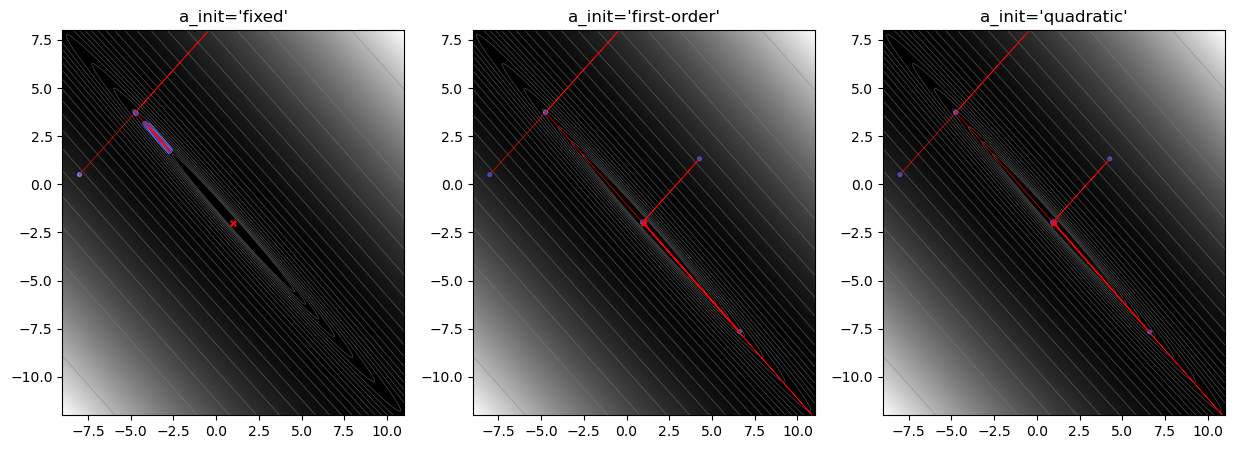

In [11]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
ax = np.ravel(ax)

# --------------------------------- no init --------------------------------- #
func = FunctionDescent('ill2')
optimizer = tz.Optimizer(func.parameters(), tz.m.StrongWolfe())
func.run(optimizer, max_steps=50)
func.plot(log_contour=True, ax=ax[0])
ax[0].set_title("a_init='fixed'")

# -------------------------------- first-order ------------------------------- #
func = FunctionDescent('ill2')
optimizer = tz.Optimizer(func.parameters(), tz.m.StrongWolfe(a_init='first-order'))

func.run(optimizer, max_steps=50)
func.plot(log_contour=True, ax=ax[1])
ax[1].set_title("a_init='first-order'")

# ------------------------------ quadratic ------------------------------ #
func = FunctionDescent('ill2')
optimizer = tz.Optimizer(func.parameters(), tz.m.StrongWolfe(a_init='quadratic'))

func.run(optimizer, max_steps=50)
func.plot(log_contour=True, ax=ax[2])
ax[2].set_title("a_init='quadratic'")

plt.show()